In [2]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import logging

import tpvalidator.mcprod.workspace as workspace

from rich import print
from rich.logging import RichHandler
from tpvalidator.utilities import temporary_log_level

# logging.basicConfig(datefmt="[%X]", handlers=[RichHandler()])
# logging.basicConfig(datefmt="[%X]", handlers=[RichHandler()])
logging.basicConfig(
    handlers=[RichHandler()],
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(name)s - %(message)s"
)

In [4]:
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARN):
    ws_st = workspace.TriggerPrimitivesWorkspace('../../data/vd/ar39/100events/trigtree_tpg_vd_ar39.root')
    # ws_st = workspace.TriggerPrimitivesWorkspace('../../data/hd/prodval/pg_muons_mk1/001/triggerAna_2025-09-11T_120640Z.ntuple.root', tps_key='tpmakerTPCsimpleThr__TriggerAnaTree1x2x6')

[10/16/25 14:33:28] INFO     2025-10-16 14:33:28,169 - INFO - root - Loading                       ]8;id=341378;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=211891;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#128\128]8;;\
                             tpmakerTPCSimpleThreshold__TriggerPrimitiveMaker                                      

In [5]:
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARN):
    ws_st.add_rawdigits('../../data/vd/ar39/100events/trigger_digits_waves_detsim_vd_ar39.root')

In [6]:
display(ws_st.event_summary)
# display(ws_st.mctruths)
# display(ws_st.mcneutrinos)
# display(ws_st.mcparticles)
# display(ws_st.ides)
# display(ws_st.tps)

[10/16/25 14:33:34] INFO     2025-10-16 14:33:34,502 - INFO - TriggerPrimitivesWorkspace - Loading ]8;id=31938;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=419569;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#170\170]8;;\
                             event summary dataset                                                                 

,event,run,subrun,tot_visible_energy_U,tot_visible_energy_V,tot_visible_energy_X,tot_numelectrons_U,tot_numelectrons_V,tot_numelectrons_X
0,1,20000047,0,1046.829255,1046.835848,1046.027547,1.601635e+07,1.601653e+07,1.600816e+07
1,2,20000047,0,1042.335725,1042.357160,1041.598783,1.589821e+07,1.589839e+07,1.589046e+07
2,3,20000047,0,1005.520658,1005.504794,1004.748447,1.536624e+07,1.536604e+07,1.535833e+07
3,4,20000047,0,1068.455221,1068.106845,1067.315855,1.626418e+07,1.625713e+07,1.624909e+07
4,5,20000047,0,1050.684062,1050.697664,1049.892879,1.599993e+07,1.599998e+07,1.599177e+07
...,...,...,...,...,...,...,...,...,...
95,96,20000047,0,1048.120901,1048.091614,1047.321018,1.603681e+07,1.603682e+07,1.602864e+07
96,97,20000047,0,1054.853670,1054.851868,1054.051786,1.609216e+07,1.609209e+07,1.608391e+07
97,98,20000047,0,1029.816058,1029.806099,1029.000545,1.567336e+07,1.567315e+07,1.566475e+07
98,99,20000047,0,1051.023866,1051.009432,1050.217845,1.607845e+07,1.607856e+07,1.607015e+07


In [7]:
ws_st.tps.query('(event==1) & (adc_integral > 1200)').readout_view

27718     2
72226     2
359687    2
465296    2
585250    2
720881    2
Name: readout_view, dtype: int32

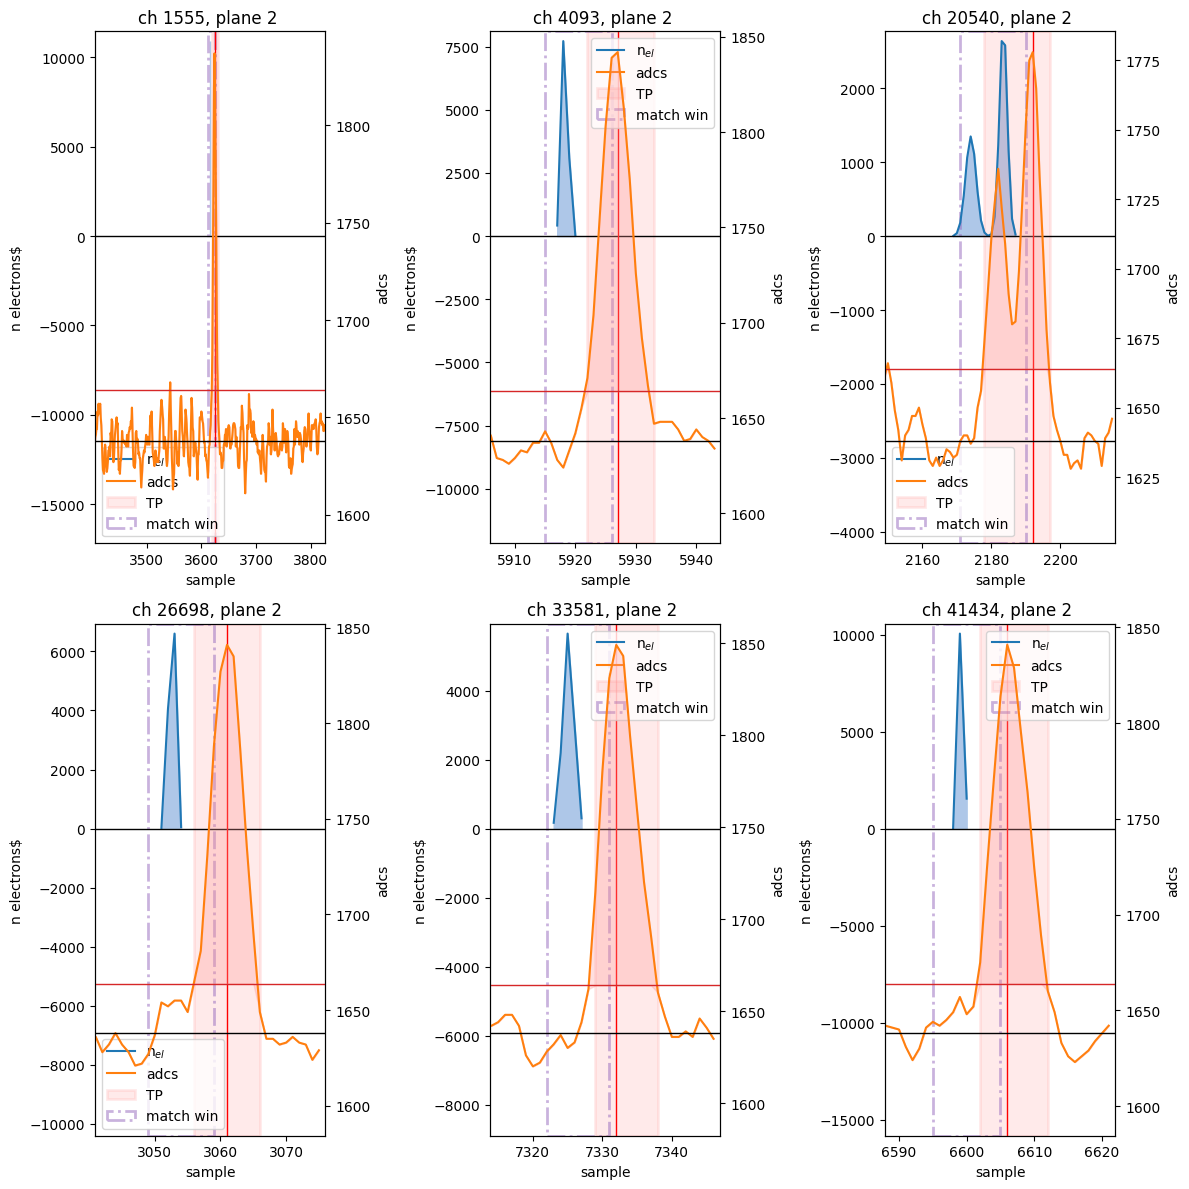

In [21]:
from tpvalidator.mcprod.backtracker import BackTrackerPlotter

figsize=(12,12)
bt_st = BackTrackerPlotter(ws_st, 1)
n=8
long_tps = ws_st.tps.query('(event==1) & (adc_integral > 1200)')
# display(long_tps)
bt_st.plot_tps_vs_ides(long_tps.iloc[0:n], figsize=figsize)
# lont_tps = ws_st.tps.query('(adc_integral > 2000) & (view == 1)')
# bt_st.plot_tps_vs_ides(lont_tps.iloc[0:n], figsize=figsize)
# lont_tps = ws_st.tps.query('(adc_integral > 2000) & (view == 2)')
# bt_st.plot_tps_vs_ides(lont_tps.iloc[0:n], figsize=figsize)

In [10]:
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARNING):
    ws_ars = workspace.TriggerPrimitivesWorkspace('../../data/hd/prodval/pg_muons_mk1/001/triggerAna_2025-09-11T_120640Z.ntuple.root', first_entry=5, last_entry=7, tps_key='tpmakerTPCabsRS__TriggerAnaTree1x2x6;1')

[10/12/25 09:35:57] INFO     2025-10-12 09:35:57,450 - INFO - root - Loading                        ]8;id=990954;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=126634;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#95\95]8;;\
                             tpmakerTPCabsRS__TriggerAnaTree1x2x6;1                                                

In [ ]:
ws_st.ides.x.min()

np.float32(-324.99927)

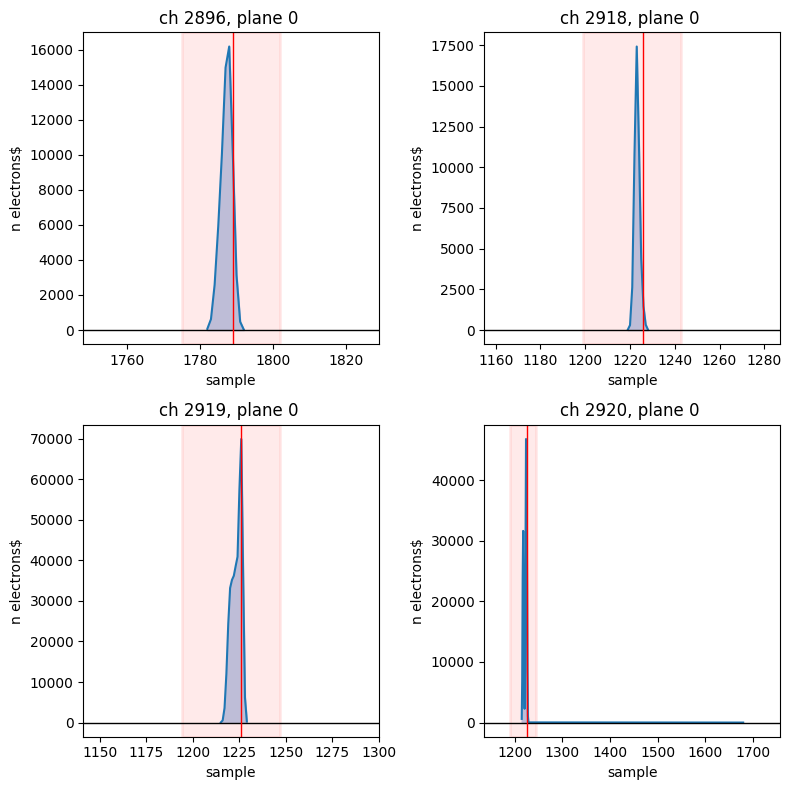

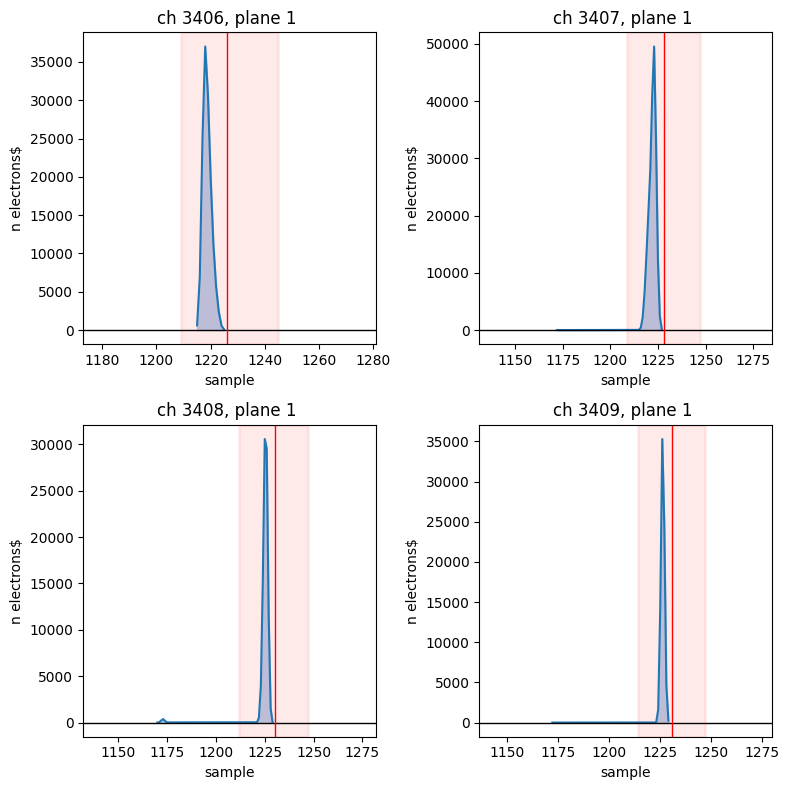

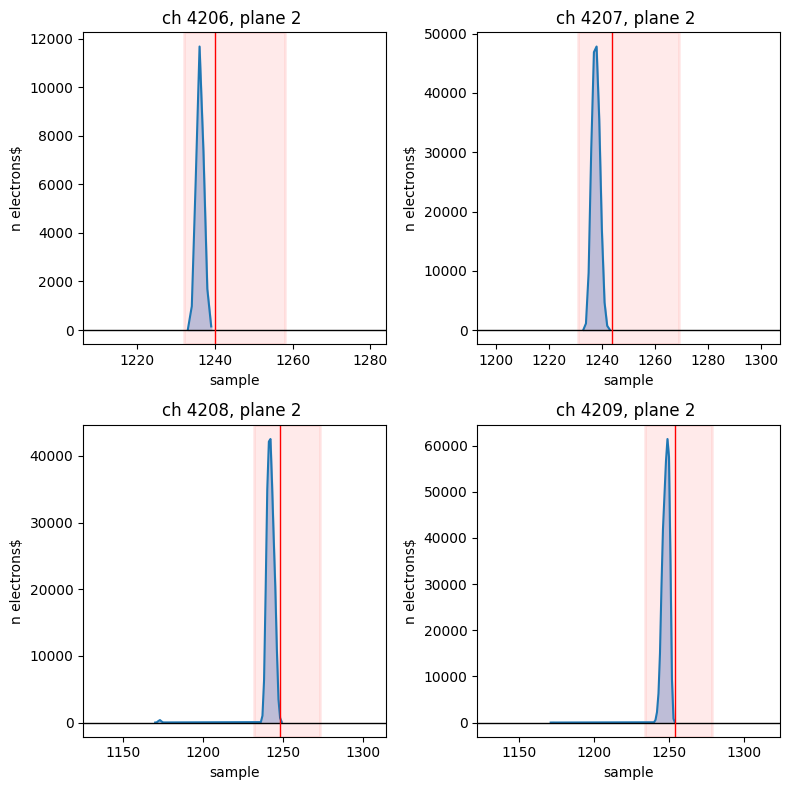

In [11]:
from tpvalidator.mcprod.backtracker import BackTrackerPlotter

figsize=(8,8)
bt_ars = BackTrackerPlotter(ws_ars, 3776)
n = 4
lont_tps = ws_ars.tps.query('(adc_integral > 8000) & (view == 0)')
bt_ars.plot_tps_vs_ides(lont_tps.iloc[0:4], figsize=figsize)
lont_tps = ws_ars.tps.query('(adc_integral > 8000) & (view == 1)')
bt_ars.plot_tps_vs_ides(lont_tps.iloc[0:4], figsize=figsize)
lont_tps = ws_ars.tps.query('(adc_integral > 8000) & (view == 2)')
bt_ars.plot_tps_vs_ides(lont_tps.iloc[0:4], figsize=figsize)

In [32]:
ws_st.tps.groupby('event').bt_numelectrons.sum()

event
1     2.797048e+07
2     2.710810e+07
3     2.676569e+07
4     2.799884e+07
5     2.739535e+07
6     2.825149e+07
7     2.717490e+07
8     2.815002e+07
9     2.741110e+07
10    2.830017e+07
Name: bt_numelectrons, dtype: float64

In [33]:
ws_st.ides.groupby('event').numelectrons.sum()

event
1     48041048.0
2     47687064.0
3     46090612.0
4     48770404.0
5     47991684.0
6     49016444.0
7     47662216.0
8     48496060.0
9     48128008.0
10    48720036.0
Name: numelectrons, dtype: float32

In [36]:
ws_st.tps.groupby(by='event').bt_numelectrons.sum()/ws_st.ides.groupby('event').numelectrons.sum()

event
1     0.582220
2     0.568458
3     0.580719
4     0.574095
5     0.570835
6     0.576368
7     0.570156
8     0.580460
9     0.569546
10    0.580873
dtype: float64

In [15]:
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.DEBUG):
    ws_st_mk1 = workspace.TriggerPrimitivesWorkspace2g('../../data/hd/prodval/pg_muons_mk1/001/triggerAna_*.ntuple.root', tps_key='tpmakerTPCsimpleThr__TriggerAnaTree1x2x6')
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARNING):
    ws_st_mk2 = workspace.TriggerPrimitivesWorkspace2g('../../data/hd/prodval/pg_muons_mk2/001/triggerAna_*.ntuple.root', tps_key='tpmakerTPCsimpleThr__TriggerAnaTree1x2x6')

with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARNING):
    ws_ars_mk1 = workspace.TriggerPrimitivesWorkspace2g('../../data/hd/prodval/pg_muons_mk1/001/triggerAna_*.ntuple.root', tps_key='tpmakerTPCabsRS__TriggerAnaTree1x2x6')
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARNING):
    ws_ars_mk2 = workspace.TriggerPrimitivesWorkspace2g('../../data/hd/prodval/pg_muons_mk2/001/triggerAna_*.ntuple.root', tps_key='tpmakerTPCabsRS__TriggerAnaTree1x2x6')



In [16]:
bt_eff_mk1 = ws_st_mk1.tps.groupby('Event').bt_numelectrons.sum()/ws_st_mk1.ides.groupby('Event').numelectrons.sum()
bt_eff_mk2 = ws_st_mk2.tps.groupby('Event').bt_numelectrons.sum()/ws_st_mk2.ides.groupby('Event').numelectrons.sum()

                    INFO     2025-10-12 09:35:57,938 - INFO - TriggerPrimitivesWorkspace2g -       ]8;id=621492;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=2446;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#278\278]8;;\
                             Loading tps dataset                                                                   

[10/12/25 09:36:07] INFO     2025-10-12 09:36:07,755 - INFO - TriggerPrimitivesWorkspace2g -       ]8;id=627543;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=551643;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#271\271]8;;\
                             Loading IDEs dataset                                                                  

[10/12/25 09:36:14] INFO     2025-10-12 09:36:14,631 - INFO - TriggerPrimitivesWorkspace2g -       ]8;id=939322;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=751640;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#278\278]8;;\
                             Loading tps dataset                                                                   

[10/12/25 09:36:24] INFO     2025-10-12 09:36:24,269 - INFO - TriggerPrimitivesWorkspace2g -       ]8;id=644905;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=646571;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#271\271]8;;\
                             Loading IDEs dataset                                                                  

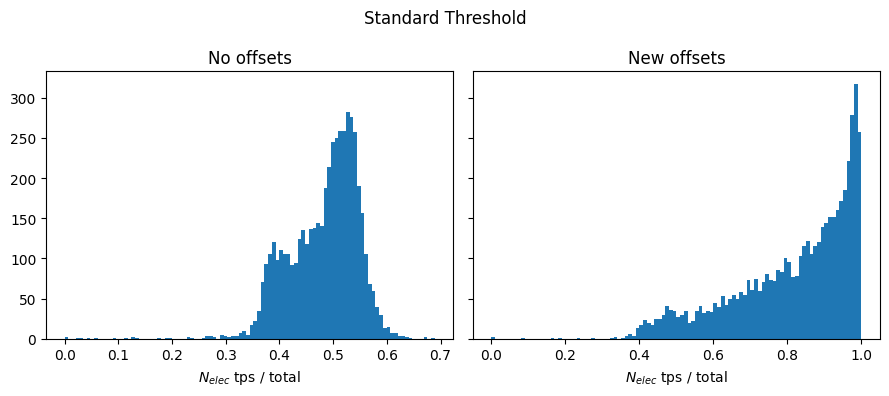

In [17]:
figsize=(9, 4)
fig, axes = plt.subplots(1,2, figsize=figsize, sharey=True)

ax = axes[0]
ax.hist(bt_eff_mk1, bins=100)
ax.set_xlabel('$N_{elec}$ tps / total')
ax.set_title("No offsets")

ax = axes[1]
ax.hist(bt_eff_mk2, bins=100)
ax.set_title("New offsets")
ax.set_xlabel('$N_{elec}$ tps / total')

fig.suptitle('Standard Threshold')
fig.tight_layout()

In [18]:
bt_eff_mk1 = ws_ars_mk1.tps.groupby('Event').bt_numelectrons.sum()/ws_ars_mk1.ides.groupby('Event').numelectrons.sum()
bt_eff_mk2 = ws_ars_mk2.tps.groupby('Event').bt_numelectrons.sum()/ws_ars_mk2.ides.groupby('Event').numelectrons.sum()

[10/12/25 09:36:31] INFO     2025-10-12 09:36:31,502 - INFO - TriggerPrimitivesWorkspace2g -       ]8;id=643856;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=983786;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#278\278]8;;\
                             Loading tps dataset                                                                   

[10/12/25 09:36:39] INFO     2025-10-12 09:36:39,599 - INFO - TriggerPrimitivesWorkspace2g -       ]8;id=172085;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=271471;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#271\271]8;;\
                             Loading IDEs dataset                                                                  

[10/12/25 09:36:46] INFO     2025-10-12 09:36:46,755 - INFO - TriggerPrimitivesWorkspace2g -       ]8;id=837789;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=258489;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#278\278]8;;\
                             Loading tps dataset                                                                   

[10/12/25 09:36:55] INFO     2025-10-12 09:36:55,083 - INFO - TriggerPrimitivesWorkspace2g -       ]8;id=462090;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py\workspace.py]8;;\:]8;id=79658;file:///Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/workspace.py#271\271]8;;\
                             Loading IDEs dataset                                                                  

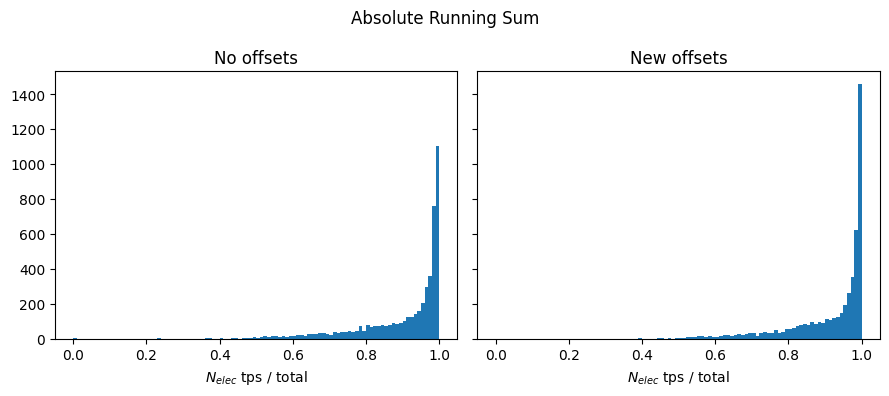

In [19]:
figsize=(9, 4)
fig, axes = plt.subplots(1,2, figsize=figsize, sharey=True)

ax = axes[0]
ax.hist(bt_eff_mk1, bins=100)
ax.set_xlabel('$N_{elec}$ tps / total')
ax.set_title("No offsets")

ax = axes[1]
ax.hist(bt_eff_mk2, bins=100)
ax.set_title("New offsets")
ax.set_xlabel('$N_{elec}$ tps / total')

fig.suptitle('Absolute Running Sum')
fig.tight_layout()